In [13]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

In [2]:

modelId = 'anthropic.claude-3-sonnet-20240229-v1:0'
accept = 'application/json'
contentType = 'application/json'
prompt = """
I'd like you to rewrite the following paragraph using the following instructions: "understandable to a 5th grader". 

"In 1758, the Swedish botanist and zoologist Carl Linnaeus published in his Systema Naturae, the two-word naming of species (binomial nomenclature). Canis is the Latin word meaning "dog", and under this genus, he listed the domestic dog, the wolf, and the golden jackal. "

Please put your rewrite in <rewrite></rewrite> tags.
"""
user_message = {'role': 'user', 'content': prompt}
messages = [user_message]
input = {
    'anthropic_version': 'bedrock-2023-05-31',
    'max_tokens': 1024,
    'system': '',
    'messages': messages
}
body = json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
content = response_body['content']
for item in content:
    print(item['text'])


<rewrite>Back in 1758, a scientist named Carl Linnaeus came up with a way to name different kinds of animals and plants using two words. He wrote a book called Systema Naturae, which means "System of Nature" in Latin. In this book, he used the Latin word "Canis," meaning "dog," to name a group of animals. Under this "Canis" group, he listed the domestic dog that people keep as pets, the wolf that lives in the wild, and an animal called the golden jackal.</rewrite>


In [3]:
# Write an Article
modelId = 'amazon.titan-text-lite-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Write an informational article for children about how birds fly.  Compare how birds fly to how airplanes fly.  Make sure to use the word "Thrust" at least three times.
"""
input = {
        'inputText': prompt,
        'textGenerationConfig': {
              'maxTokenCount': 4096,
              'stopSequences': [],
              'temperature': 0,
              'topP': 1
        }
    }
body = json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
results = response_body['results']
for result in results:
    print(result['outputText'])


Birds and airplanes are both capable of flying, but they use different methods to achieve this feat. Let's compare how birds fly to how airplanes fly.

Birds use a combination of flapping and gliding to stay in the air. They flap their wings rapidly, creating a small amount of lift, which helps them stay in the air. However, they also use their wings to slow down and glide, which allows them to control their speed and altitude.

On the other hand, airplanes use a different method called thrust. Thrust is the force that propels an airplane forward. Airplanes use four main types of thrust:

Thrust from the engines: The engines provide the main thrust that moves the airplane forward.
Thrust from the wings: The wings generate lift, which helps the airplane stay in the air.
Thrust from the weight of the airplane: The weight of the airplane also helps to generate thrust.
Thrust from the speed of the airplane: The faster the airplane moves, the more thrust it generates.

In addition to these 

In [5]:
# Write a Promo Doc
modelId = 'amazon.titan-text-lite-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Bob has been at the company for 3.5 years and is up for promotion for senior manager.  
Bob has the following accomplishments: 
- led the delivery of a new software product for productivity. 
- mentored 10 employees. 
- presented to 20 different end customers  which converted into 18 new users. 

Using  the above content, write a business professional narrrative about Bobs performance.  The narrative must include the reasons why bob should be promoted and mention three amazons leadership principles. 
"""
input = {
        'inputText': prompt,
        'textGenerationConfig': {
              'maxTokenCount': 4096,
              'stopSequences': [],
              'temperature': 0.1,
              'topP': 1
        }
    }
body = json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
results = response_body['results']
for result in results:
    print(result['outputText'])


Bob has been with the company for 3.5 years and is up for promotion to senior manager. As a senior manager, Bob will be responsible for leading a team of 15-20 employees and driving the success of our software products. 

Throughout his time at the company, Bob has demonstrated exceptional leadership skills. He led the successful delivery of a new software product that increased productivity for our customers, mentored 10 employees to help them develop their skills and advance in their careers, and presented to 20 different end customers, converting 18 of them into new users of our software. 

Bob's leadership skills are rooted in Amazon's four leadership principles: customer obsession, passion for invention, operational excellence, and building a strong team. He has a deep understanding of customer needs and works tirelessly to deliver solutions that meet and exceed their expectations. Bob is also passionate about innovation and constantly looks for ways to improve our products and pr

In [6]:
# Code Generation V1
modelId = 'ai21.j2-ultra'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Write the Python code to plot the cosine curve.
"""
input = {
    'prompt': prompt, 
    'maxTokens': 1024,
    'temperature': 0.3,
    'topP': 1.0,
    'stopSequences': [],
    'countPenalty': {'scale': 0},
    'presencePenalty': {'scale': 0},
    'frequencyPenalty': {'scale': 0}
}
body = json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
completions = response_body['completions']
for part in completions:
    print(part['data']['text'])


```
import matplotlib.pyplot as plt
import numpy as np

# Define the amplitude and frequency of the curve
amplitude = 2.0
frequency = 1.0

# Define the x-values for the curve
x = np.linspace(-5 * np.pi, 5 * np.pi, 100)

# Calculate the y-values for the curve
y = amplitude * np.cos(frequency * x)

# Plot the curve
plt.plot(x, y)

# Set the x-axis label
plt.xlabel('x')

# Set the y-axis label
plt.ylabel('y')

# Show the plot
plt.show()

```

This code uses the`numpy`library to define an array`x`of x-values and an array`y`of y-values. The`amplitude`and`frequency`parameters are used to define the shape and behavior of the cosine curve. The`plot()`function is used to plot the curve, and the`xlabel()`and`ylabel()`functions are used to set the axis labels. Finally, the`show()`function is used to display the plotted curve.


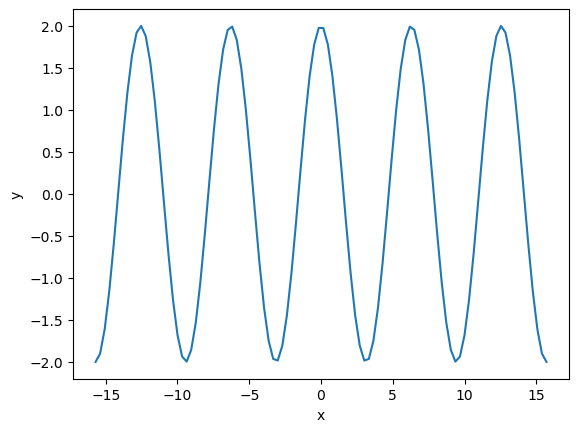

In [8]:
# Testing the code generated above 

import matplotlib.pyplot as plt
import numpy as np

# Define the amplitude and frequency of the curve
amplitude = 2.0
frequency = 1.0

# Define the x-values for the curve
x = np.linspace(-5 * np.pi, 5 * np.pi, 100)

# Calculate the y-values for the curve
y = amplitude * np.cos(frequency * x)

# Plot the curve
plt.plot(x, y)

# Set the x-axis label
plt.xlabel('x')

# Set the y-axis label
plt.ylabel('y')

# Show the plot
plt.show()

In [9]:
bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'ai21.j2-ultra'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Write the Python code to plot the cosine curve, with degrees on the x axis.
"""

input = {
    'prompt': prompt, 
    'maxTokens': 1024,
    'temperature': 0.3,
    'topP': 1.0,
    'stopSequences': [],
    'countPenalty': {'scale': 0},
    'presencePenalty': {'scale': 0},
    'frequencyPenalty': {'scale': 0}
}
body = json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
completions = response_body['completions']
for part in completions:
    print(part['data']['text'])

```
import matplotlib.pyplot as plt
import numpy as np

# Define the cosine function
def cos_curve(x):
    return np.cos(x)

# Generate x values between 0 and 360 degrees
x = np.linspace(0, 360, 100)

# Generate y values using the cosine curve
y = cos_curve(x)

# Plot the cosine curve
plt.plot(x, y)

# Set labels and title
plt.xlabel('Degrees')
plt.ylabel('Cosine')
plt.title('Cosine Curve')

# Show the plot
plt.show()

```

This code uses the`numpy`library to generate the x values between 0 and 360 degrees, and the`matplotlib`library to plot the cosine curve. The`cos_curve`function is defined to calculate the y values using the cosine function.

The resulting plot will show the cosine curve with degrees on the x axis.


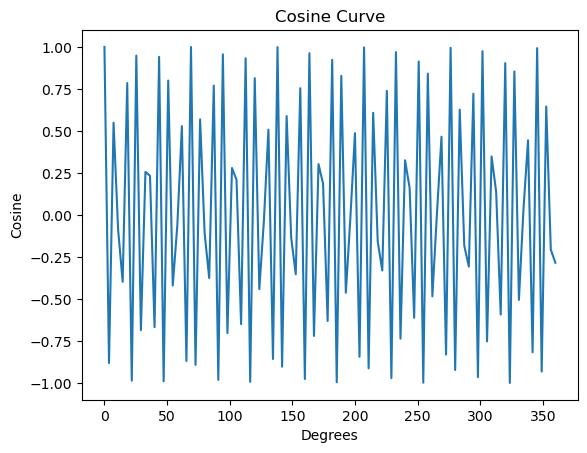

In [10]:
# Testing the code generated above 

import matplotlib.pyplot as plt
import numpy as np

# Define the cosine function
def cos_curve(x):
    return np.cos(x)

# Generate x values between 0 and 360 degrees
x = np.linspace(0, 360, 100)

# Generate y values using the cosine curve
y = cos_curve(x)

# Plot the cosine curve
plt.plot(x, y)

# Set labels and title
plt.xlabel('Degrees')
plt.ylabel('Cosine')
plt.title('Cosine Curve')

# Show the plot
plt.show()

In [11]:
modelId = 'ai21.j2-ultra'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Write the Python code to plot the sine and cosine curves on the same plot with labels, with degrees on the x axis. 
"""

input = {
    'prompt': prompt, 
    'maxTokens': 1024,
    'temperature': 0.3,
    'topP': 1.0,
    'stopSequences': [],
    'countPenalty': {'scale': 0},
    'presencePenalty': {'scale': 0},
    'frequencyPenalty': {'scale': 0}
}
body = json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
completions = response_body['completions']
for part in completions:
    print(part['data']['text'])

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 100)

plt.plot(x, np.sin(x), label='Sine')
plt.plot(x, np.cos(x), label='Cosine')
plt.xlabel('Degrees')
plt.ylabel('Values')
plt.title('Sine and Cosine Curves')
plt.legend()
```
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 100)

plt.plot(x, np.sin(x), label='Sine')
plt.plot(x, np.cos(x), label='Cosine')
plt.xlabel('Degrees')
plt.ylabel('Values')
plt.title('Sine and Cosine Curves')
plt.legend()
plt.show()
```
This code will generate a plot with the sine curve (blue) and the cosine curve (red). The x-axis will be labeled in degrees, and the y-axis will be labeled "Values." The legend will display the labels "Sine" and "Cosine" for the curves. Finally, the `plt.show()` function will display the plot.


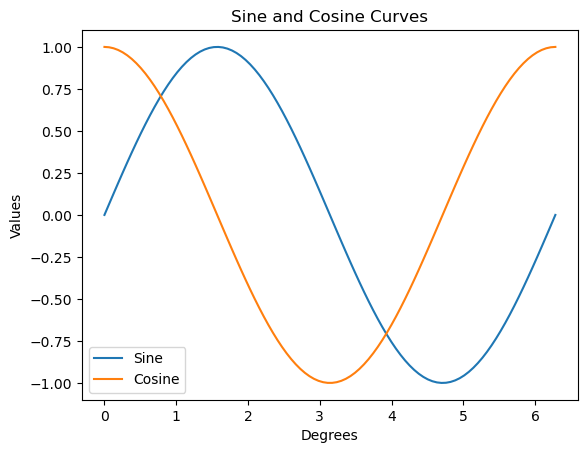

In [12]:
# Testing the code generated above 

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 100)

plt.plot(x, np.sin(x), label='Sine')
plt.plot(x, np.cos(x), label='Cosine')
plt.xlabel('Degrees')
plt.ylabel('Values')
plt.title('Sine and Cosine Curves')
plt.legend()
plt.show()

NameError: name 'invoke_model' is not defined